# 📝 Exercise M2.01

The aim of this exercise is to make the following experiments:

* train and test a support vector machine classifier through
  cross-validation;
* study the effect of the parameter gamma of this classifier using a
  validation curve;
* use a learning curve to determine the usefulness of adding new
  samples in the dataset when building a classifier.

To make these experiments we will first load the blood transfusion dataset.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

In [3]:
blood_transfusion.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
dtypes: int64(4)
memory usage: 23.5 KB


In [5]:
target

0          donated
1          donated
2          donated
3          donated
4      not donated
          ...     
743    not donated
744    not donated
745    not donated
746    not donated
747    not donated
Name: Class, Length: 748, dtype: object

We will use a support vector machine classifier (SVM). In its most simple
form, a SVM classifier is a linear classifier behaving similarly to a
logistic regression. Indeed, the optimization used to find the optimal
weights of the linear model are different but we don't need to know these
details for the exercise.

Also, this classifier can become more flexible/expressive by using a
so-called kernel that makes the model become non-linear. Again, no requirement
regarding the mathematics is required to accomplish this exercise.

We will use an RBF kernel where a parameter `gamma` allows to tune the
flexibility of the model.

First let's create a predictive pipeline made of:

* a [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  with default parameter;
* a [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
  where the parameter `kernel` could be set to `"rbf"`. Note that this is the
  default.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf')
)

Evaluate the generalization performance of your model by cross-validation with a
`ShuffleSplit` scheme. Thus, you can use
[`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
and pass a [`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)
to the `cv` parameter. Only fix the `random_state=0` in the `ShuffleSplit`
and let the other parameters to the default.

In [14]:
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(random_state=0) # default n_splits=10
cv_results = cross_validate(
    pipeline,
    data,
    target,
    cv=cv
)

print(cv_results)

{'fit_time': array([0.02593231, 0.01598525, 0.01801133, 0.01501417, 0.01695228,
       0.01696157, 0.01601243, 0.01401591, 0.0189662 , 0.01720881]), 'score_time': array([0.00801492, 0.00408244, 0.00398946, 0.00593019, 0.00398898,
       0.00398421, 0.00493193, 0.00892067, 0.00400162, 0.00596786]), 'test_score': array([0.68      , 0.74666667, 0.78666667, 0.8       , 0.74666667,
       0.78666667, 0.8       , 0.82666667, 0.74666667, 0.73333333])}


As previously mentioned, the parameter `gamma` is one of the parameters
controlling under/over-fitting in support vector machine with an RBF kernel.

Evaluate the effect of the parameter `gamma` by using the
[`sklearn.model_selection.validation_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) function.
You can leave the default `scoring=None` which is equivalent to
`scoring="accuracy"` for classification problems. You can vary `gamma`
between `10e-3` and `10e2` by generating samples on a logarithmic scale
with the help of `np.logspace(-3, 2, num=30)`. 

Since we are manipulating a `Pipeline` the parameter name will be set to
`svc__gamma` instead of only `gamma`. You can retrieve the parameter name
using `model.get_params().keys()`. We will go more into detail regarding
accessing and setting hyperparameter in the next section.

In [10]:
pipeline.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [15]:
import numpy as np
from sklearn.model_selection import validation_curve

gamma_range = np.logspace(-3, 2, num=30)  
train_scores, test_scores = validation_curve(
    pipeline,
    data,
    target,
    param_name="svc__gamma",
    param_range=gamma_range,
    cv=cv,
)

Plot the validation curve for the train and test scores.

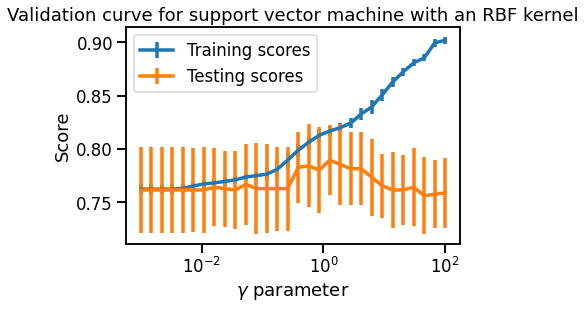

In [22]:
import matplotlib.pyplot as plt

plt.errorbar(
    x=gamma_range,
    y=train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label="Training scores"
)
plt.errorbar(
    x=gamma_range,
    y=test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    label="Testing scores"
)
plt.xscale("log")
plt.legend()

plt.xlabel(r"$\gamma$ parameter")
plt.ylabel("Score")
_ = plt.title("Validation curve for support vector machine with an RBF kernel")

My understanding is that the training score increases only from a value of gamma around 10$^{1}$ and beyond, however, while the testing score starts to increase in the same range, the later decreases again readily after a gamma value of 10$^{0}$. Therefore the best value $\gamma$ parameter may be around 10$^0$. _Of note, the standard deviation for the testing scores is substantial at all values of gamma tested._

Now, you can perform an analysis to check whether adding new samples to the
dataset could help our model to better generalize. Compute the learning curve
(using [`sklearn.model_selection.learning_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html))
by computing the train and test scores for different training dataset size.
Plot the train and test scores with respect to the number of samples.

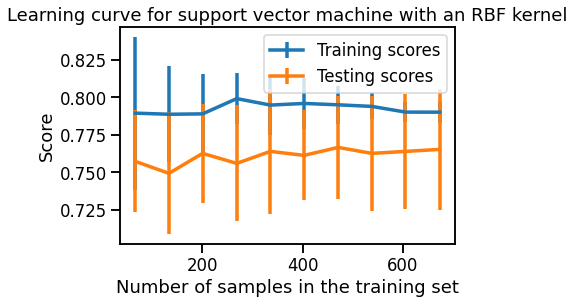

In [25]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, num=10, endpoint=True)

results = learning_curve(
    pipeline,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
)

train_size, train_scores, test_scores = results[:3]

plt.errorbar(
    x=train_size,
    y=train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    label="Training scores"
)
plt.errorbar(
    x=train_size,
    y=test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    label="Testing scores"
)
plt.legend()

plt.xlabel("Number of samples in the training set")
plt.ylabel("Score")
_ = plt.title("Learning curve for support vector machine with an RBF kernel")

Not really big changes while increasing the number of samples in the training set, though we may see a tendency for higher testing scores beyond 200, i.e. approximately 30% of the total samples.